In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')
print(G)

Graph with 1429 nodes and 19357 edges


In [3]:
# Our simple SI function.
def si_simple(G, i_nodes, beta):
   new_infected = i_nodes.copy()
   s_neighbors_of_i = {n for i_node in i_nodes for n in G.neighbors(i_node)}
   for s_node in s_neighbors_of_i:
      if random.random() < beta:
         new_infected.add(s_node)
   return new_infected

In [7]:
# The cascade SI function. Same as threshold SI, but with a relative threshold.
def si_cascade(G, i_nodes, beta):
   new_infected = i_nodes.copy()
   s_nodes = set(G.nodes) - i_nodes
   for s_node in s_nodes:
      neighbors = set(G.neighbors(s_node))
      if (len(neighbors & i_nodes) / len(neighbors)) >= beta:
         new_infected.add(s_node)
   return new_infected

In [4]:
# We modify our SI function so that it follows the threshold model.
def si_threshold(G, i_nodes, kappa):
   new_infected = i_nodes.copy()
   s_nodes = set(G.nodes) - i_nodes
   for s_node in s_nodes:
      if len(set(G.neighbors(s_node)) & i_nodes) >= kappa:
         new_infected.add(s_node)
   return new_infected

In [21]:
model_curve = defaultdict(lambda : defaultdict(float))
for run in range(10):
   # The seed set should be the same for all models
   i_nodes_simple = set(random.sample(set(G.nodes), 10))
   i_nodes_threshold = i_nodes_simple.copy()
   i_nodes_cascade = i_nodes_simple.copy()
   for step in range(50):
      i_nodes_simple = si_simple(G, i_nodes_simple, 0.1)
      i_nodes_threshold = si_threshold(G, i_nodes_threshold, 2)
      i_nodes_cascade = si_cascade(G, i_nodes_cascade, 0.1)
      # Since we run 10 times, we average the infected set size
      model_curve["simple"][step] += (len(i_nodes_simple) / len(G.nodes)) / 10
      model_curve["threshold"][step] += (len(i_nodes_threshold) / len(G.nodes)) / 10
      model_curve["cascade"][step] += (len(i_nodes_cascade) / len(G.nodes)) / 10

/var/folders/49/1k50p6kj6d173t0f0hl4h0700000gn/T/ipykernel_45617/929800467.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  i_nodes_simple = set(random.sample(set(G.nodes), 10))


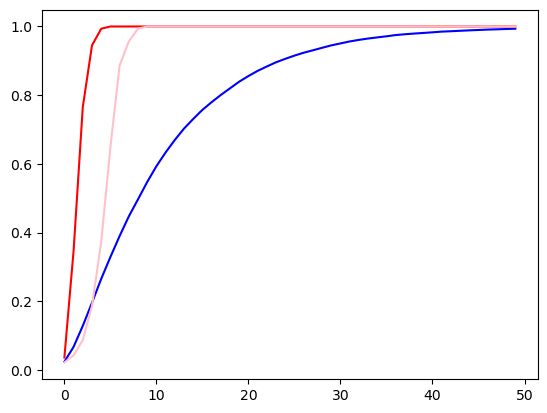

In [22]:
plt.plot([model_curve["simple"][step] for step in range(50)],label='Simple Model', color='blue')
plt.plot([model_curve["threshold"][step] for step in range(50)],label='threshold Model', color='red')
plt.plot([model_curve["cascade"][step] for step in range(50)],label='cascade Model', color='pink')
plt.show()